<a href="https://colab.research.google.com/github/FranciscoMoralesActuary/Practica-de-Seguros-Autos/blob/main/%C3%A1rboles_de_decision_pr%C3%A1ctica_seguros_autos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Código elaborado por Franciso Morales [LinkedIn](https://www.linkedin.com/in/francisco-morales-actuario/)**
---

 Fuente de los datos [Aseguradora de autos](https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?select=sample_submission.csv)

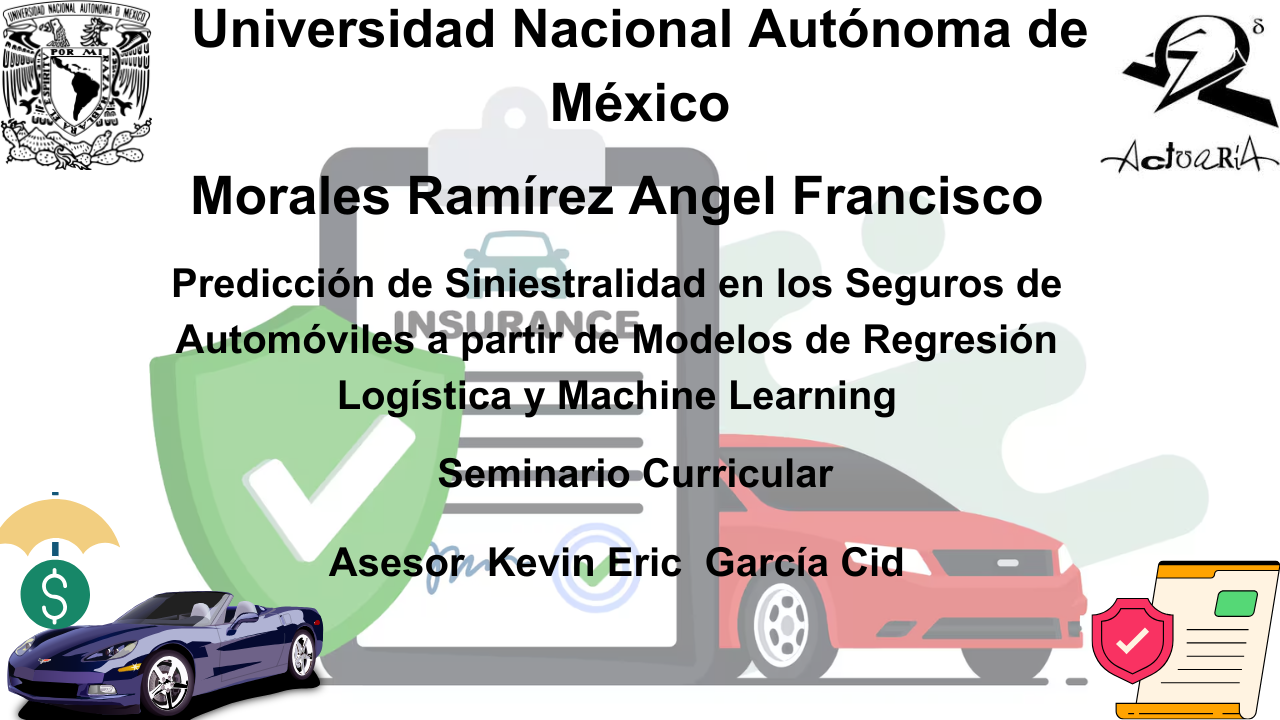

---
# **Intalación e importación de librerías**®️
---

In [1]:
#Instalación de paqueterias
#Manipulación de datos
install.packages("tidyverse")
#Árboles de decisión
install.packages("rpart")
#Gráfico
install.packages("rattle")
#Importar datos
install.packages("readr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
#Importación de librerías
library(tidyverse)
library(rpart)
library(rattle)
library(readr)
library(rpart.plot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



---
# **Importación de datos**📋
---

In [3]:
#Importación de datos
df <- read.csv('https://raw.githubusercontent.com/FranciscoMoralesActuary/Practica-de-Seguros-Autos/refs/heads/main/fraude.csv')
head(df)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,⋯,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,⋯,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,⋯,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,⋯,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,⋯,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,⋯,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
6,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,⋯,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision


In [4]:
#Información del modelo
summary(df)

    Month            WeekOfMonth     DayOfWeek             Make          
 Length:15420       Min.   :1.000   Length:15420       Length:15420      
 Class :character   1st Qu.:2.000   Class :character   Class :character  
 Mode  :character   Median :3.000   Mode  :character   Mode  :character  
                    Mean   :2.789                                        
                    3rd Qu.:4.000                                        
                    Max.   :5.000                                        
 AccidentArea       DayOfWeekClaimed   MonthClaimed       WeekOfMonthClaimed
 Length:15420       Length:15420       Length:15420       Min.   :1.000     
 Class :character   Class :character   Class :character   1st Qu.:2.000     
 Mode  :character   Mode  :character   Mode  :character   Median :3.000     
                                                          Mean   :2.694     
                                                          3rd Qu.:4.000     
                    

In [5]:
#Valores nulos
sum(is.na(df))

[1] 0

---
#**Selección de variables**🎯

---

In [6]:
#Eliminar variables irrelevantes
df <- df %>%
  select(-PolicyNumber)

In [7]:
#Variables predictoras
xi <- df[ , names(df) != "FraudFound_P"]

In [8]:
#Variable objetivo
y <- 'FraudFound_P'

In [9]:
#Selección de variables
modelo <- reformulate(names(xi), y)

In [10]:
#Semilla para replicar resultados
set.seed(1234)

---
# **Árboles de Desición** 🌲
---

In [13]:
#Implementación de arboles de desición
arbol <- rpart(modelo,
               df,
               control = rpart.control(cp = 0,
                                       maxdepth = 3))

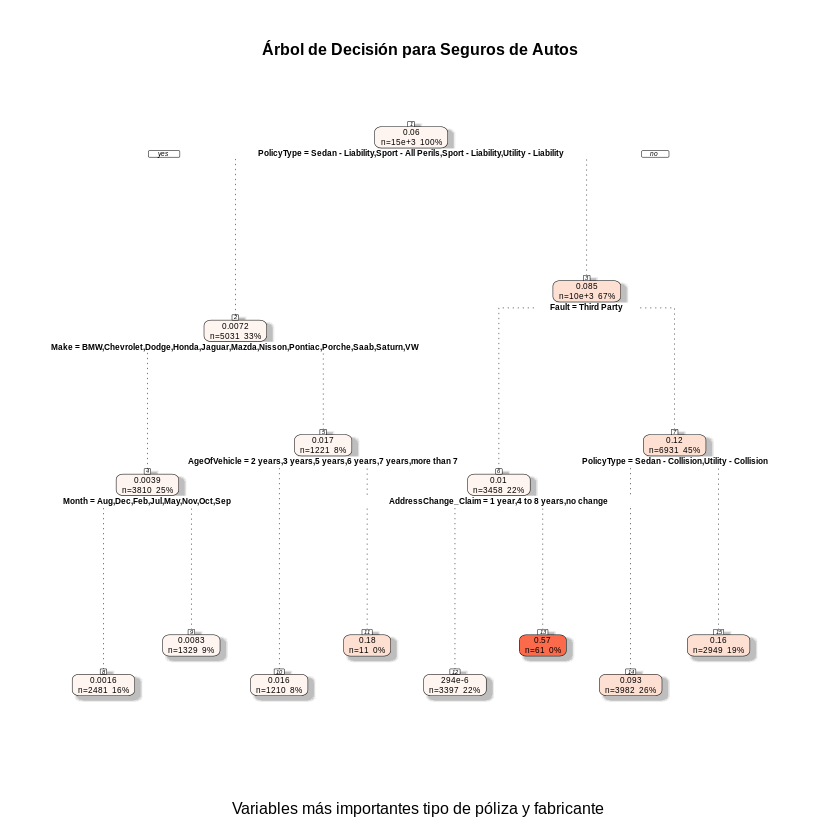

In [14]:
#Gráfica
fancyRpartPlot(arbol,
              #Título
              main = "Árbol de Decisión para Seguros de Autos",
              #Subtítulo
              sub = "Variables más importantes tipo de póliza y fabricante",
              #2 Digitos
              digits = 2,
              #Color de nodos
              nn.col = "black",
              #Paleta de colores
              palette = "Reds",
              )